In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
from fastai.vision.all import *
from fastbook import *

In [3]:
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim


In [4]:
# This is the low level implementation of the fastai api, i.e pytorch at it's core

# We will perform the base oeration of ETL:
# Extract - get the fashion mnist data from source
# Transform - put our data in tensor form
# Load - put our data to an object to make it easily accessible 

# This will be done using the dataset and dataloader abstract classes directly from the torch library

In [5]:
train_set = torchvision.datasets.FashionMNIST(
    root='/home/slabban/machine_learning_courses/datasets'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
    
)

#'./data/FashionMNIST'

/home/slabban/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448234945/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
train_set?


Type:        FashionMNIST
String form:
Dataset FashionMNIST
           Number of datapoints: 60000
           Root location: /home/slabban/machine_lea <...>     Split: Train
           StandardTransform
           Transform: Compose(
           ToTensor()
           )
Length:      60000
File:        ~/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py
Docstring:  
`Fashion-MNIST <https://github.com/zalandoresearch/fashion-mnist>`_ Dataset.

Args:
    root (string): Root directory of dataset where ``FashionMNIST/processed/training.pt``
        and  ``FashionMNIST/processed/test.pt`` exist.
    train (bool, optional): If True, creates dataset from ``training.pt``,
        otherwise from ``test.pt``.
    download (bool, optional): If true, downloads the dataset from the internet and
        puts it in root directory. If dataset is already downloaded, it is not
        downloaded again.
    transform (callable, optional): A function/transform that  takes in an PIL image
  

In [7]:
# We set up the dataloader iterator
train_loader = torch.utils.data.DataLoader(train_set)

In [8]:
train_loader?

Type:        DataLoader
String form: <torch.utils.data.dataloader.DataLoader object at 0x7f028df75520>
Length:      60000
File:        ~/anaconda3/lib/python3.8/site-packages/torch/utils/data/dataloader.py
Docstring:  
Data loader. Combines a dataset and a sampler, and provides an iterable over
the given dataset.

The :class:`~torch.utils.data.DataLoader` supports both map-style and
iterable-style datasets with single- or multi-process loading, customizing
loading order and optional automatic batching (collation) and memory pinning.

See :py:mod:`torch.utils.data` documentation page for more details.

Args:
    dataset (Dataset): dataset from which to load the data.
    batch_size (int, optional): how many samples per batch to load
        (default: ``1``).
    shuffle (bool, optional): set to ``True`` to have the data reshuffled
        at every epoch (default: ``False``).
    sampler (Sampler or Iterable, optional): defines the strategy to draw
        samples from the dataset. Can b

In [9]:
# We set up the same Dataloader, but include the batch size
train_loader = torch.utils.data.DataLoader(train_set, batch_size=10)

In [10]:
# We can have a look at our train set data
len(train_set)
train_set.train_labels

/home/slabban/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([9, 0, 0,  ..., 3, 0, 5])

In [11]:
# Here we use the bincount method to validate that we have the same amount of data for each category
# It is very important that the numbers match!
train_set.train_labels.bincount()

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [12]:
# We can inspect an element of this train set using pythons built-in iter function 
sample = next(iter(train_set))

In [13]:
len(sample)

2

In [14]:
type(sample)

tuple

In [15]:
image, label = sample

In [16]:
type(image)

torch.Tensor

In [17]:
# We have respectively: Color Chanel, Height, Width
image.shape

torch.Size([1, 28, 28])

label = 9


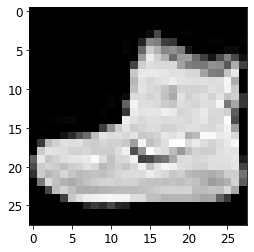

In [18]:
plt.imshow(image.squeeze(), cmap='gray')
print('label =', label)

In [19]:
# Similar to the train set, we may also iterate through the data loader
batch = next(iter(train_loader))

In [20]:
type(batch)

list

In [21]:
len(batch)

2

In [22]:
images, labels = batch

In [23]:
type(images)

torch.Tensor

In [24]:
# We can see that the images tensor is a batch of images of size 10 as we specified
images.shape

torch.Size([10, 1, 28, 28])

In [25]:
labels.shape

torch.Size([10])

In [26]:
grid = torchvision.utils.make_grid(images, nrow=10)

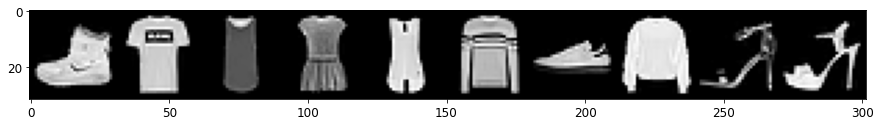

In [27]:
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

In [28]:
# Now that that ETL process is done, we can set up our model
# This is done using the base class called 'Module'. Module is the core class from which neural nets
# are built from

# The next building block is a method called forward pass, which is the transformation of our tensor as it passes
# through our layer or neural network
# Within the forward pass, we use methods from the torch's functional class to construct layers

In [29]:
# The nn.Module is the base class that we will use to build our neural networks
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.fc3 = nn.Linear(in_features=60, out_features=10)
        
    def forward(self, t):
        t = self.layer(t)
        return t

In [30]:
network = Network()

In [31]:
# We can very our nn structure using the 'print' operator
print(network)

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (fc3): Linear(in_features=60, out_features=10, bias=True)
)


In [32]:
# We can also view additonal information using the '?' operator provided in Notebooks
network??

Signature:       network(*input, **kwargs)
Type:            Network
String form:    
Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (fc3): Linear(in_features=60, out_features=10, bias=True)
)
Docstring:       <no docstring>
Class docstring:
Base class for all neural network modules.

Your models should also subclass this class.

Modules can also contain other Modules, allowing to nest them in
a tree structure. You can assign the submodules as regular attributes::

    import torch.nn as nn
    import torch.nn.functional as F

    class Model(nn.Module):
        def __init__(self):
            super(Model, self).__init__()
            self.conv1 = nn.Conv2d(1, 20, 5)
            self.conv2 = nn.Conv2d(20, 20, 5)

        def forward(self, x):
            x = F.relu(self.conv1(x))
    

In [33]:
# A quick python lesson, dunder functions (ex. __init__, __repr__) are functions that are written using the 'object'
# base class written in python. We simply override these functions when we inherit 'object'
# __repr__ in this case is meant to tell the user what the class represents, this is part of good 
# API writing practices
network.__repr__
object.__repr__

<slot wrapper '__repr__' of 'object' objects>

In [34]:
# Accessing the internals of the class using the dot operator

network.conv1

Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))

In [35]:
# We see that the convolutional layer, while comprised of 6 ourput filters, is packaged into a single tensor 
network.conv1.weight.shape

torch.Size([6, 1, 5, 5])

In [36]:
# To access the individual filter

network.conv1.weight[0].shape

torch.Size([1, 5, 5])

In [37]:
# Conv2 will have 6 filters coming in from conv1

network.conv2.weight.shape

torch.Size([12, 6, 5, 5])

In [38]:
# We can access the filters similarly

network.conv2.weight[0].shape

torch.Size([6, 5, 5])

In [39]:
# Looking at the fully connected layers, we see a rank 2 tensor that is known as a weight matrix
# Where the rows are layer output shape and the columns are the input shape
# This reflects how matrix multiplication works.. Internally the linear layer creates a weight matrix that 
# transforms the in_feature to the out_features
# This equation manifests in the form of y = Ax+b, where: 
# y = out_features, A = weight matrix, x = in_features, b = bias

network.fc1.weight.shape

torch.Size([120, 192])

In [40]:
network.fc2.weight.shape

torch.Size([60, 120])

In [41]:
# We can quickly access these weights using iteration

for param in network.parameters():
    print(param.shape)

torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([12, 6, 5, 5])
torch.Size([12])
torch.Size([120, 192])
torch.Size([120])
torch.Size([60, 120])
torch.Size([60])
torch.Size([10, 60])
torch.Size([10])


In [42]:
# for a labelled view

for name, param in network.named_parameters():
    print(name, '\t\t',param.shape)

conv1.weight 		 torch.Size([6, 1, 5, 5])
conv1.bias 		 torch.Size([6])
conv2.weight 		 torch.Size([12, 6, 5, 5])
conv2.bias 		 torch.Size([12])
fc1.weight 		 torch.Size([120, 192])
fc1.bias 		 torch.Size([120])
fc2.weight 		 torch.Size([60, 120])
fc2.bias 		 torch.Size([60])
fc3.weight 		 torch.Size([10, 60])
fc3.bias 		 torch.Size([10])


In [43]:
# Lets build on our Network class by implementing the 'forward' method, which accepts and returns a tensor
# We dont actually call this method ourselves as it is called via the __call__ function in our instantiated layers
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
        
    def forward(self, t):
       t = self.conv1(t)
       t = F.relu(t)
       t = F.max_pool2d(t, kernel_size =2, stride=2)

       t = self.conv2(t)
       t = F.relu(t)
       t = F.max_pool2d(t, kernel_size =2, stride=2)

       t = t.reshape(-1, 12*4*4)
       t = self.fc1(t)
       t = F.relu(t)

       t = self.fc2(t)
       t = F.relu(t)

       t = self.out(t)

       return t

In [44]:
# Lets use our forward method to get a prediction for iteration of our batch from above!

network  = Network()


In [45]:
preds = network(images)

/home/slabban/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448234945/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [46]:
preds

tensor([[-3.3426e-03, -7.1323e-02,  7.8255e-02, -8.3808e-02,  6.5652e-03, -5.0777e-02, -8.8978e-02, -5.0551e-02,  8.2188e-02, -1.0216e-01],
        [ 1.0020e-04, -7.1054e-02,  8.0478e-02, -8.3540e-02,  9.1273e-03, -5.0264e-02, -8.4848e-02, -5.0446e-02,  8.3748e-02, -1.0265e-01],
        [ 1.0123e-03, -6.7141e-02,  8.4918e-02, -8.7293e-02,  8.3175e-03, -5.6603e-02, -9.0827e-02, -4.6471e-02,  8.3293e-02, -9.6956e-02],
        [-5.7489e-04, -6.9723e-02,  8.0905e-02, -8.6568e-02,  9.3787e-03, -5.4597e-02, -8.9130e-02, -4.6755e-02,  8.2357e-02, -9.6836e-02],
        [-3.9236e-03, -7.1148e-02,  7.7897e-02, -8.1536e-02,  5.4800e-03, -5.2923e-02, -8.4848e-02, -5.0493e-02,  8.1978e-02, -1.0026e-01],
        [ 2.0220e-03, -7.1849e-02,  8.4364e-02, -8.4682e-02,  1.1787e-02, -5.2186e-02, -8.8768e-02, -4.9554e-02,  8.2816e-02, -1.0016e-01],
        [ 2.6240e-03, -6.6019e-02,  8.6990e-02, -8.8091e-02,  1.3576e-02, -4.7835e-02, -9.2482e-02, -4.5429e-02,  8.5548e-02, -9.6504e-02],
        [-2.7865e-03

In [47]:
# We can view these values as a probablility using the softmax function

F.softmax(preds, dim=1)

tensor([[0.1023, 0.0956, 0.1110, 0.0944, 0.1033, 0.0976, 0.0939, 0.0976, 0.1115, 0.0927],
        [0.1025, 0.0955, 0.1111, 0.0943, 0.1035, 0.0975, 0.0942, 0.0975, 0.1115, 0.0925],
        [0.1026, 0.0958, 0.1116, 0.0939, 0.1034, 0.0969, 0.0936, 0.0978, 0.1114, 0.0930],
        [0.1025, 0.0956, 0.1112, 0.0940, 0.1035, 0.0971, 0.0938, 0.0979, 0.1113, 0.0931],
        [0.1022, 0.0956, 0.1109, 0.0946, 0.1032, 0.0973, 0.0943, 0.0976, 0.1114, 0.0928],
        [0.1027, 0.0954, 0.1115, 0.0942, 0.1037, 0.0973, 0.0938, 0.0975, 0.1113, 0.0927],
        [0.1026, 0.0957, 0.1116, 0.0937, 0.1037, 0.0975, 0.0932, 0.0977, 0.1114, 0.0929],
        [0.1023, 0.0957, 0.1111, 0.0946, 0.1030, 0.0971, 0.0942, 0.0980, 0.1110, 0.0930],
        [0.1032, 0.0955, 0.1118, 0.0936, 0.1038, 0.0967, 0.0937, 0.0973, 0.1114, 0.0928],
        [0.1034, 0.0953, 0.1117, 0.0936, 0.1039, 0.0968, 0.0942, 0.0972, 0.1113, 0.0927]], grad_fn=<SoftmaxBackward>)

In [48]:
labels

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])

In [49]:
# Comparing the preds to the argmax, which returns the index with the highest value, we can see that the batch predictions are clearly inaccurate
# which is what we would expect, interestingly, it predicts all objects to be the same, this is may be due to the batch havin similar images
preds.argmax(dim=1)

tensor([8, 8, 2, 8, 8, 2, 2, 2, 2, 2])

In [50]:
preds.shape

torch.Size([10, 10])

In [51]:
# Lets try another batch, we can see in the second iteration, we can see that the second batch has different predictions
sample = iter(train_loader)
iter1 = sample.next()
iter2 = sample.next()
images1, labels1 = iter2
preds = network(images1)
preds.argmax(dim=1)

tensor([8, 8, 2, 8, 2, 8, 8, 8, 2, 2])

In [52]:
# Since these weights are randomly initialized everytime we instantiate the class, we will most likely see different predictions if we instantiate
# the class again, just to keep in mind..

net1 = Network()
preds1 = net1(images)
preds1.argmax(dim=1)

tensor([9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [53]:
# We can predict the predictions against the label using:

preds.argmax(dim=1).eq(labels)

tensor([False, False, False, False, False, False, False, False, False, False])

In [54]:
# We can sum our correct predictions using 

preds.argmax(dim=1).eq(labels).sum()

tensor(0)

In [55]:
# Lets create a quick util function for this

def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

In [56]:
# Lets get to training! I will recreate the dataloader, but will use a a batch size of 100 

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
batch = next(iter(train_loader))
images, labels = batch

In [57]:
# An important thing for multiple class predictions is the use a loss function called 'Cross-Entropy Loss'.
# Cross-Entropy loss comprises of two parts

# 1. Softmax. This is a extension of  sigmoid fucntion that allows us to get predictions for multiple 
# clasification i.e have an output layer that comprises of more than one neuron. 
# The basic Sigmoid falls short as taking the sum of the predictions for 2 or more classes will give us
# a value that is greater than one, which does not make any sense.
# The Softmax modification correts for this and sums the total predictions to one, as done above.
# An interesting observation about Softmax is that it exponentially increases the output.

# 2. Log Likelihood. In a nutshell, this uses indexing to enumerate individual classes with their 
# own unique value, this enables us to assign predictions to multiple classes, and hence, have their own
# prediction

# Interstingly enough, we don't actually take the natural log, it is found to be much more efficient and accurate 
# to take the nautal log during the Softmax portion. The reason we take the log is to give our model the ability
# To further train our model beyond the restriction of 0 to 1, from -infinity to 0 (ln(0) - ln(1))

In [58]:
# Calculating the loss:

preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item()

2.3157265186309814

In [59]:
# When looking at the weights in the conv kernels, you can see at the end that there is a parameter called 'required_grad'
# That tracks the operations done on the weight and is the key behind backpropagation
print(network.conv2.weight)

Parameter containing:
tensor([[[[-2.8316e-02, -4.8351e-02, -3.7559e-02,  6.8216e-02,  5.5711e-02],
          [-3.6886e-02,  8.0723e-02,  3.0644e-02,  2.6414e-02, -6.2474e-02],
          [-2.0288e-02,  7.2119e-02,  5.3936e-02,  4.2113e-02, -3.9325e-02],
          [-2.0261e-02,  3.3725e-02,  2.7609e-02, -2.5013e-02, -4.1496e-02],
          [-6.5895e-02, -6.5045e-02, -3.3760e-02,  4.3067e-02, -3.9707e-02]],

         [[ 2.6576e-02, -5.7274e-02, -2.5711e-03, -4.8753e-02, -3.7714e-02],
          [ 4.9149e-02,  2.1616e-02,  7.2044e-02,  2.0826e-02,  2.0473e-03],
          [ 6.6232e-02, -5.7235e-02,  4.7176e-02, -2.2034e-04, -2.3772e-03],
          [-5.0638e-02, -3.6921e-04, -5.2505e-02,  4.7058e-02, -5.4225e-02],
          [-8.3587e-03,  7.7379e-02, -6.9040e-03, -6.5488e-02,  2.0533e-02]],

         [[ 2.1017e-02, -4.0556e-02, -6.9674e-02, -8.1555e-02, -4.4096e-02],
          [ 2.1344e-03, -7.3207e-02, -6.8388e-02,  2.5125e-02, -6.5908e-02],
          [ 5.1277e-04,  2.2318e-02,  7.2474e-02, 

In [60]:
# We can inspect access the current gradient of those weight, which should not exist since we havent
# actually backpropagated the loss
print(network.conv2.weight.grad)

None


In [61]:
# Calculating the gradients
loss.backward()

In [62]:
network.conv1.weight.grad.shape

torch.Size([6, 1, 5, 5])

In [63]:
# Now that we have our gradients, we can an optimizer such as SGD or ADAM to update the weights and assign a learning rate 'lr'
optimizer = optim.Adam(network.parameters(), lr=0.01)

In [64]:
loss.item()

2.3157265186309814

In [65]:
# Let do a quick check for the orrect predicitons using our new function
get_num_correct(preds, labels)

13

In [66]:
# This is the magical weight updating step for backpropagation
optimizer.step()

In [67]:
# New lets pass the batch in again an see if we had some imporvement
preds = network(images)
loss = F.cross_entropy(preds, labels)

In [68]:
# The loss has decreased
loss.item()

2.2907307147979736

In [69]:
# Our correct predictions have gone from 4 to 14
get_num_correct(preds, labels)

20

In [70]:
# Lets group the steps needed to run one batch through our network 

network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

batch = next(iter(train_loader))
images, labels = batch

preds = network(images)
loss = F.cross_entropy(preds, labels)

loss.backward()
optimizer.step()

# Print the loss decrease after 1 epoch
print('loss1:', loss.item())
preds = network(images)
loss = F.cross_entropy(preds, labels)
print('loss2:', loss.item())

loss1: 2.3020825386047363
loss2: 2.2572433948516846


In [72]:
# Using our dataloader iterator, we can loop through all the batches using the same block run above
# The complete run of all batches is called an epoch

network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

total_loss = 0 
total_correct = 0

for batch in train_loader:
  images, labels = batch

  preds = network(images)
  loss = F.cross_entropy(preds, labels)

  # In the iterative case, we zero out the gradients as they are accumulated by default
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  total_loss += loss.item()
  total_correct += get_num_correct(preds, labels)

print("epoch:", 0, "total_correct", total_correct, "loss:", total_loss)

epoch: 0 total_correct 46518 loss: 355.6099427640438


In [73]:
# We can gauge out accuracy using our total correct values

model_accuracy = total_correct/len(train_set)
print(model_accuracy)

0.7753


In [75]:
# Building further on the block, we introduce multiple epochs 

network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

for epoch in range(5):

  total_loss = 0 
  total_correct = 0

  for batch in train_loader:
    images, labels = batch

    preds = network(images)
    loss = F.cross_entropy(preds, labels)

    # In the iterative case, we zero out the gradients as they are accumulated by default
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total_loss += loss.item()
    total_correct += get_num_correct(preds, labels)

  print("epoch:", epoch, "total_correct", total_correct, "loss:", total_loss)

epoch: 0 total_correct 47055 loss: 343.2991219460964
epoch: 1 total_correct 51273 loss: 235.7713549733162
epoch: 2 total_correct 52058 loss: 212.8116049617529
epoch: 3 total_correct 52534 loss: 203.6005694270134
epoch: 4 total_correct 52794 loss: 196.73454809188843


In [77]:
# Lets gauge our accuracy again

model_accuracy = total_correct/len(train_set)
print(model_accuracy)

0.8799


In [81]:
# Analyzing CNN Results via building a confusion matrix

len(train_set)

60000

In [82]:
# The targets correspond to the labels, which should match the train set
len(train_set.targets)

60000

In [83]:
# We will need to get the predictions from the model, which we would prefer to get
# via our dataloader, since it is better than feeding the entire set in one run (Unless you have a monster machine)

def get_all_preds(model, loader):
  all_preds = torch.tensor([])
  for batch in loader:
    images, labels = batch
    preds = model(images)
    all_preds = torch.cat((all_preds, preds), dim=0)
  return all_preds


In [84]:
# Getting a little insight into the 'cat' method, we can confirm that the predictions 
# is in the form of a rank 2 tensor, where the first axis are the images and the 
# second axis are our classes, concatenating by the first dimension, the output
# of this function should be (60000, 10)

preds = network(images)
preds.shape

torch.Size([100, 10])

In [89]:
# Lets create a larger batch size for these predictions and run the our function
# As a good practice, its computationally better to run these operations with the 
# gradient disabled: 

with torch.no_grad():
  prediction_loader = torch.utils.data.DataLoader(train_set, batch_size= 10000)
  train_preds = get_all_preds(network, prediction_loader)


In [90]:
# We confirm the output of our function

train_preds.shape

torch.Size([60000, 10])

In [118]:
# Now to build our confusion matrix
# First we need to align our original targets(labels) with our predicitons

train_set.targets
train_preds.argmax(dim=1)

stacked = torch.stack((train_set.targets, train_preds.argmax(dim=1)), dim=1)

In [119]:
stacked.shape

torch.Size([60000, 2])

In [120]:
stacked

tensor([[9, 9],
        [0, 0],
        [0, 0],
        ...,
        [3, 3],
        [0, 0],
        [5, 5]])

In [128]:
# Lets now create a tensor to represent the confusion matrix
cMat = torch.zeros(10,10, dtype=torch.int32)
cMat

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=torch.int32)

In [129]:
# going through our stacked values, we can increment the respective correct slot 
for p in stacked:
  tl,pl = p.tolist()
  cMat[tl,pl] = cMat[tl,pl]+1

In [130]:
cMat

tensor([[5633,    4,   71,   85,   11,    3,  164,    0,   29,    0],
        [  16, 5883,   13,   68,    8,    0,    8,    0,    4,    0],
        [ 104,    5, 4689,   62,  551,    0,  581,    0,    8,    0],
        [ 285,   63,   13, 5361,  180,    0,   93,    0,    5,    0],
        [  22,    7,  303,  181, 4538,    0,  940,    0,    9,    0],
        [   4,    0,    2,    3,    0, 5732,    0,  186,   14,   59],
        [1570,   15,  423,  105,  220,    0, 3602,    0,   65,    0],
        [   0,    0,    0,    0,    0,   39,    0, 5833,    2,  126],
        [  24,    6,   35,   17,   22,    5,   46,   17, 5824,    4],
        [   0,    0,    0,    1,    0,   23,    0,  231,    4, 5741]], dtype=torch.int32)

In [132]:
# To make things easier down the line, we can use libraries to plot these matrices 

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, plot_confusion_matrix




In [134]:
conf_mat = confusion_matrix(train_set.targets, train_preds.argmax(dim=1))
print(type(conf_mat))

<class 'numpy.ndarray'>


In [140]:
# Using Chris' function for plotting the confusion matrix
# source: https://deeplizard.com/learn/video/0LhiS6yu2qQ
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
tensor([[5633,    4,   71,   85,   11,    3,  164,    0,   29,    0],
        [  16, 5883,   13,   68,    8,    0,    8,    0,    4,    0],
        [ 104,    5, 4689,   62,  551,    0,  581,    0,    8,    0],
        [ 285,   63,   13, 5361,  180,    0,   93,    0,    5,    0],
        [  22,    7,  303,  181, 4538,    0,  940,    0,    9,    0],
        [   4,    0,    2,    3,    0, 5732,    0,  186,   14,   59],
        [1570,   15,  423,  105,  220,    0, 3602,    0,   65,    0],
        [   0,    0,    0,    0,    0,   39,    0, 5833,    2,  126],
        [  24,    6,   35,   17,   22,    5,   46,   17, 5824,    4],
        [   0,    0,    0,    1,    0,   23,    0,  231,    4, 5741]], dtype=torch.int32)


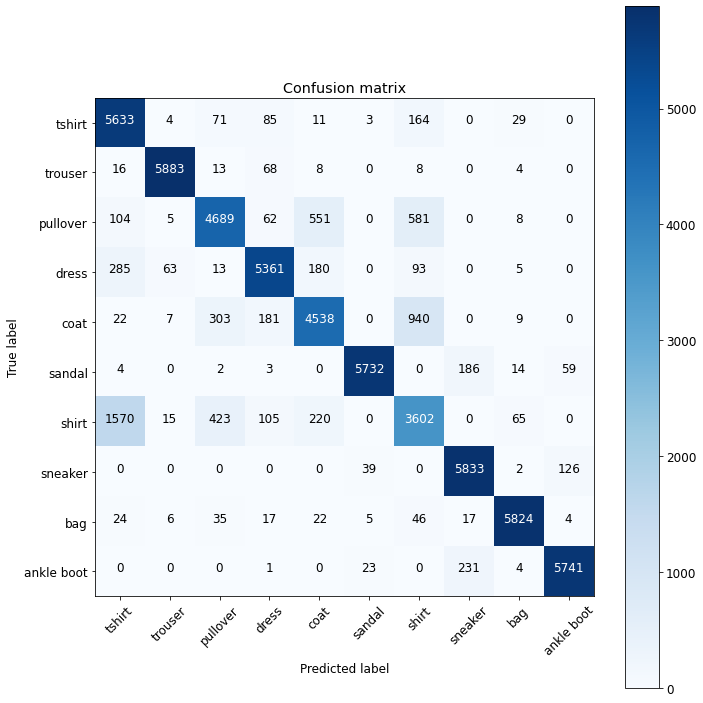

In [144]:

names = ('tshirt', 'trouser','pullover', 'dress', 'coat','sandal','shirt','sneaker','bag','ankle boot')
plt.figure(figsize=(10,10))
plot_confusion_matrix(cMat, names)